## Method of lines (MOL) example

Solve the unsteady diffusion equation using the method of lines.
$$\frac{dy}{dt} = \alpha\frac{d^2y}{dx^2} + S.$$
Assume Dirichlet boundary conditions.

Discretize the equation as:
$$\frac{dy}{dt} = \frac{\alpha}{\Delta x^2}(y_{i-1}-2y_{i}+y_{i+1}) + S.$$
If we write a grid with grid points on the boundaries, we'll solve for the interior points only, and Dirichlet conditions will be implied as the known $y_{i-1}$ and $y_{i+1}$ for $i$ next to the lower and upper boundaries.

In [58]:
using Plots
using ColorSchemes           # https://juliagraphics.github.io/ColorSchemes.jl/stable/basics/, https://docs.juliaplots.org/latest/generated/colorschemes/0
using DifferentialEquations

In [59]:
function rhs!(dydt, y, params, t) 
    # S, α, Δx are defined globally
    
    N = length(y)
    dydt[1] = dydt[end] = 0.0
    i = 2:N-1       # interior points
    
    @. dydt[i] = α/Δx^2.0*(y[i-1] - 2.0*y[i] + y[i+1]) + S
end;

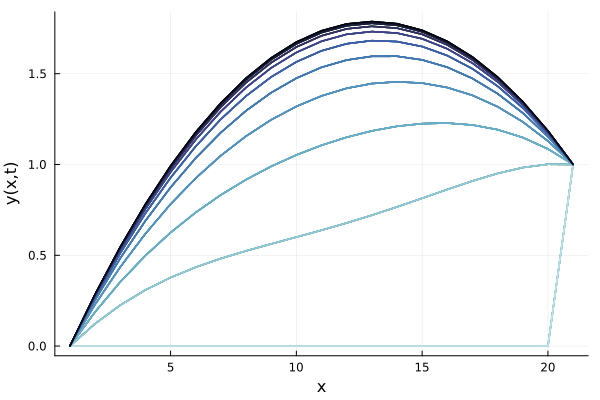

In [60]:
Ldom  = 1.0                   # domain length
N     = 21                    # number of grid pts including boundaries
ybcLo = 0.0                   # low bc
ybcHi = 1.0                   # high bc
S     = 10.0                  # source term
α     = 1.0                   # diffusivity
tend  = 0.5*Ldom^2/α          # integration time

x  = LinRange(0.0,Ldom,N)     # grid the domain
Δx = x[2]-x[1]
y0 = zeros(N)                 # Initial condition
y0[1]   = ybcLo               # Known low boundary value
y0[end] = ybcHi               # Know high boundary value

#------------- Solve the problem

ntimes = 10
times_to_plot = LinRange(0.0,tend,ntimes)

params = nothing
odeprob = ODEProblem(rhs!, y0, [0.0,tend], params)
sol = solve(odeprob)
sol(times_to_plot[5])

#------------- Plot the result

fcolors = LinRange(0.1,1,ntimes)
#colors = cm.Blues(np.linspace(0.2,1,ntimes))
##colors = byuignite_jet(np.linspace(0,1,ntimes))
#
p = plot
for i in 1:ntimes
    p=plot!(sol(times_to_plot[i]), linewidth=1.5, color=get(cgrad(ColorSchemes.ice, rev=true), fcolors[i]))
end
p=plot!(xlabel="x", ylabel="y(x,t)")
p=plot!(legend=nothing)
display(p)
